# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [15]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [16]:
df_fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
df_fraud.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [17]:
# 1. What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
# Yes, the dataset is quite imbalanced

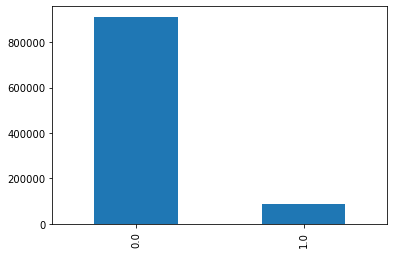

In [18]:
fraud = df_fraud["fraud"].value_counts()
fraud.plot(kind="bar")
plt.show()

In [19]:
# 2. Train a LogisticRegression.

In [20]:
features = df_fraud.drop(columns = ["fraud"])
target = df_fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
log_reg = LogisticRegression()

In [23]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [24]:
log_reg.score(X_test_scaled, y_test)

0.9586

In [25]:
# 3. Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [26]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    227998
         1.0       0.89      0.60      0.72     22002

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



In [27]:
# 4. Run Oversample in order to balance our target variable and repeat the steps above, now with balanced data. 
# Does it improve the performance of our model?

In [28]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [29]:
train["fraud"] = y_train.values

In [30]:
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [31]:
yes_fraud_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [32]:
train_over = pd.concat([yes_fraud_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
30329,0.093360,-0.174154,2.098330,0.366769,-0.735363,-0.334424,0.732621,1.0
499068,-0.221451,-0.177118,1.116649,0.366769,-0.735363,-0.334424,0.732621,1.0
487943,-0.175307,-0.164532,11.714732,0.366769,1.359872,-0.334424,0.732621,1.0
600153,1.355802,0.659187,1.520079,0.366769,1.359872,-0.334424,0.732621,1.0
525460,-0.133120,-0.044700,3.106937,0.366769,-0.735363,-0.334424,0.732621,1.0
...,...,...,...,...,...,...,...,...
749995,-0.346501,-0.102784,-0.142658,0.366769,-0.735363,-0.334424,-1.364962,0.0
749996,0.097438,-0.181678,-0.508440,0.366769,1.359872,2.990219,0.732621,0.0
749997,-0.354851,-0.177582,-0.563646,0.366769,1.359872,-0.334424,0.732621,0.0
749998,-0.369139,-0.120433,-0.087166,0.366769,-0.735363,-0.334424,-1.364962,0.0


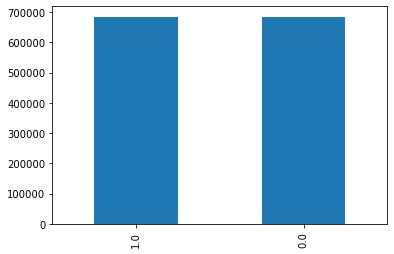

In [33]:
survived_plt = train_over["fraud"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

In [34]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [35]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [36]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

C:\Users\Rike\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    227998
         1.0       0.58      0.95      0.72     22002

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [37]:
# 5. Now, run Undersample in order to balance our target variable and repeat the steps above (1-3), now with balanced data.
# Does it improve the performance of our model?

In [38]:
no_fraud_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
160608,-0.374393,-0.174965,-0.379618,0.366769,1.359872,-0.334424,-1.364962,0.0
505961,-0.402718,-0.189379,0.462586,-2.726515,-0.735363,-0.334424,0.732621,0.0
643519,0.347991,-0.156890,-0.583571,0.366769,-0.735363,-0.334424,0.732621,0.0
376535,0.100572,-0.185658,-0.486702,0.366769,1.359872,-0.334424,-1.364962,0.0
505507,0.053053,-0.116011,0.296758,0.366769,1.359872,-0.334424,-1.364962,0.0
...,...,...,...,...,...,...,...,...
370469,0.025098,-0.180560,-0.212504,0.366769,-0.735363,-0.334424,0.732621,0.0
158630,-0.407043,0.066220,-0.023963,-2.726515,-0.735363,-0.334424,0.732621,0.0
376426,0.018870,-0.184777,-0.558820,0.366769,-0.735363,-0.334424,0.732621,0.0
593215,0.321093,-0.104227,-0.541480,0.366769,1.359872,2.990219,0.732621,0.0


In [39]:
train_under = pd.concat([no_fraud_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
160608,-0.374393,-0.174965,-0.379618,0.366769,1.359872,-0.334424,-1.364962,0.0
505961,-0.402718,-0.189379,0.462586,-2.726515,-0.735363,-0.334424,0.732621,0.0
643519,0.347991,-0.156890,-0.583571,0.366769,-0.735363,-0.334424,0.732621,0.0
376535,0.100572,-0.185658,-0.486702,0.366769,1.359872,-0.334424,-1.364962,0.0
505507,0.053053,-0.116011,0.296758,0.366769,1.359872,-0.334424,-1.364962,0.0
...,...,...,...,...,...,...,...,...
749949,-0.355798,-0.109746,1.086950,0.366769,-0.735363,-0.334424,0.732621,1.0
749957,-0.127912,-0.169646,1.709389,0.366769,-0.735363,-0.334424,0.732621,1.0
749961,-0.230739,-0.172694,0.872307,0.366769,1.359872,-0.334424,0.732621,1.0
749972,-0.344727,-0.049306,1.931061,0.366769,-0.735363,-0.334424,0.732621,1.0


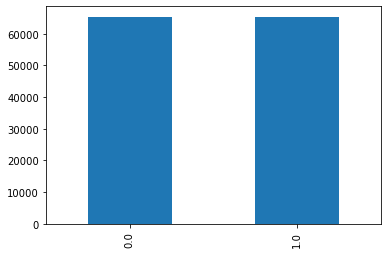

In [40]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [41]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [43]:
# evaluation
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

C:\Users\Rike\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    227998
         1.0       0.58      0.95      0.72     22002

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [44]:
##########################################  SMOTE  ##################################################################

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
# !pip install imbalanced-learn

In [47]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [48]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [49]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [50]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    227998
         1.0       0.58      0.95      0.72     22002

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

